In [ ]:
 # Preparing Final Plots for Paper




In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import healpy as hp
import numpy as np
import matplotlib.cm as cm



In [78]:
# Defining important metrics

NSIDE = 512
areas = ['north', 'south', 'des']
galaxies = ['lrg', 'elg', 'qso', 'glbg', 'rlbg']

### Begin by creating final dataframe of columns and densities

In [79]:

df_north = pd.read_csv(f'../regression/results/north_complete_{NSIDE}.csv')
df_south = pd.read_csv(f'../regression/results/south_complete_{NSIDE}.csv')
df_des = pd.read_csv(f'../regression/results/des_complete_{NSIDE}.csv')

df_deep_north = pd.read_csv(f'../deep_set/results/north_ds_predictions.csv')
df_deep_south = pd.read_csv(f'../deep_set/results/south_ds_predictions.csv')
df_deep_des = pd.read_csv(f'../deep_set/results/des_ds_predictions.csv')

df_north = df_north.merge(df_deep_north, how='inner', on='pixel_id')
df_south = df_south.merge(df_deep_south, how='inner', on='pixel_id')
df_des = df_des.merge(df_deep_des, how='inner', on='pixel_id')


In [19]:
df_north.columns

Index(['pixel_id', 'lrg', 'elg', 'qso', 'glbg', 'rlbg', 'exposures', 'hinh',
       'gaia', 'gaia12', 'sagitarius', 'stellar', 'EBV', 'airmass',
       'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'ccdskycounts_g',
       'ccdskycounts_r', 'ccdskycounts_z', 'seeing_g', 'seeing_r', 'seeing_z',
       'lrg_lin', 'elg_lin', 'qso_lin', 'glbg_lin', 'rlbg_lin', 'lrg_nn',
       'elg_nn', 'qso_nn', 'glbg_nn', 'rlbg_nn', 'lrg_deep', 'elg_deep',
       'qso_deep', 'glbg_deep', 'rlbg_deep'],
      dtype='object')

In [21]:
### Get Full Data R-Squareds for the table

for area in areas:
    if area == 'north':
        df = df_north
    elif area == 'south':
        df = df_south
    else:
        df = df_des

    print(f'Area: {area.upper()}.')
    print("+++++++++++++++++++++++++++++++++++")
    print()

    for gal in galaxies:
        y_gold = df[gal]
        r2_lin = round(metrics.r2_score(y_gold, df[f'{gal}_lin']),3)
        r2_nn = round(metrics.r2_score(y_gold, df[f'{gal}_nn']),3)
        r2_deep = round(metrics.r2_score(y_gold, df[f'{gal}_deep']),3)
        print(f'{gal.upper()}')
        print(f' Lin: {r2_lin}')
        print(f' NN: {r2_nn}')
        print(f' DeepSet: {r2_deep}')
        print()
        print()



Area: NORTH.
+++++++++++++++++++++++++++++++++++

LRG
 Lin: 0.01
 NN: 0.008
 DeepSet: 0.013


ELG
 Lin: 0.08
 NN: 0.139
 DeepSet: 0.141


QSO
 Lin: 0.104
 NN: 0.112
 DeepSet: 0.127


GLBG
 Lin: 0.109
 NN: 0.21
 DeepSet: 0.23


RLBG
 Lin: 0.103
 NN: 0.175
 DeepSet: 0.279


Area: SOUTH.
+++++++++++++++++++++++++++++++++++

LRG
 Lin: 0.006
 NN: 0.006
 DeepSet: 0.005


ELG
 Lin: 0.061
 NN: 0.108
 DeepSet: 0.105


QSO
 Lin: 0.091
 NN: 0.095
 DeepSet: 0.098


GLBG
 Lin: 0.046
 NN: 0.167
 DeepSet: 0.138


RLBG
 Lin: 0.03
 NN: 0.169
 DeepSet: 0.15


Area: DES.
+++++++++++++++++++++++++++++++++++

LRG
 Lin: 0.011
 NN: 0.02
 DeepSet: 0.026


ELG
 Lin: 0.026
 NN: 0.048
 DeepSet: 0.048


QSO
 Lin: 0.035
 NN: 0.033
 DeepSet: 0.03


GLBG
 Lin: 0.075
 NN: 0.105
 DeepSet: 0.1


RLBG
 Lin: 0.036
 NN: 0.064
 DeepSet: 0.101




In [41]:
df_south.head()

,pixel_id,lrg,elg,qso,glbg,rlbg,exposures,hinh,gaia,gaia12,...,elg_deep,qso_deep,glbg_deep,rlbg_deep,lrg_density,elg_density,qso_density,glbg_density,rlbg_density,bin
0,1379283,2,34,3,17,11,0.113095,0.364966,0.086957,0.109589,...,29.553139,4.046019,21.042707,8.674086,-0.000654,-0.107048,-0.031887,-0.025876,0.015828,8
1,1132814,14,28,4,21,4,0.107143,0.089204,0.115942,0.164384,...,34.207500,3.879919,22.452089,6.539557,-0.020073,0.033584,-0.071631,0.039368,-0.234148,22
2,1680243,6,25,4,11,9,0.119048,0.361590,0.115942,0.202055,...,31.107903,4.223598,16.013529,8.598740,0.006420,-0.060071,0.010603,-0.258690,0.007004,29
3,1061671,13,35,3,27,8,0.113095,0.421537,0.420290,0.606164,...,31.135662,6.125065,23.480526,9.320211,0.072425,-0.059232,0.465577,0.086978,0.091496,35
4,1161326,12,38,10,14,8,0.095238,0.101190,0.130435,0.102740,...,33.514492,3.653577,17.673252,9.554616,-0.023588,0.012645,-0.125789,-0.181857,0.118948,37


In [24]:
# systematics values

dfs = [df_north, df_south, df_des]
cols = ['exposures', 'hinh',
       'gaia', 'gaia12', 'sagitarius', 'stellar', 'EBV', 'airmass',
       'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'ccdskycounts_g',
       'ccdskycounts_r', 'ccdskycounts_z', 'seeing_g', 'seeing_r', 'seeing_z']



count    363049.000000
mean          0.107811
std           0.043606
min           0.000000
25%           0.084211
50%           0.094737
75%           0.115789
max           1.000000
Name: exposures, dtype: float64

count    363049.000000
mean          0.157086
std           0.150858
min           0.000000
25%           0.053927
50%           0.099926
75%           0.218835
max           1.000000
Name: hinh, dtype: float64

count    363049.000000
mean          0.192558
std           0.144273
min           0.000000
25%           0.086957
50%           0.144928
75%           0.246377
max           1.000000
Name: gaia, dtype: float64

count    363049.000000
mean          0.197984
std           0.164144
min           0.000000
25%           0.092466
50%           0.136986
75%           0.239726
max           1.000000
Name: gaia12, dtype: float64

count    363049.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
N

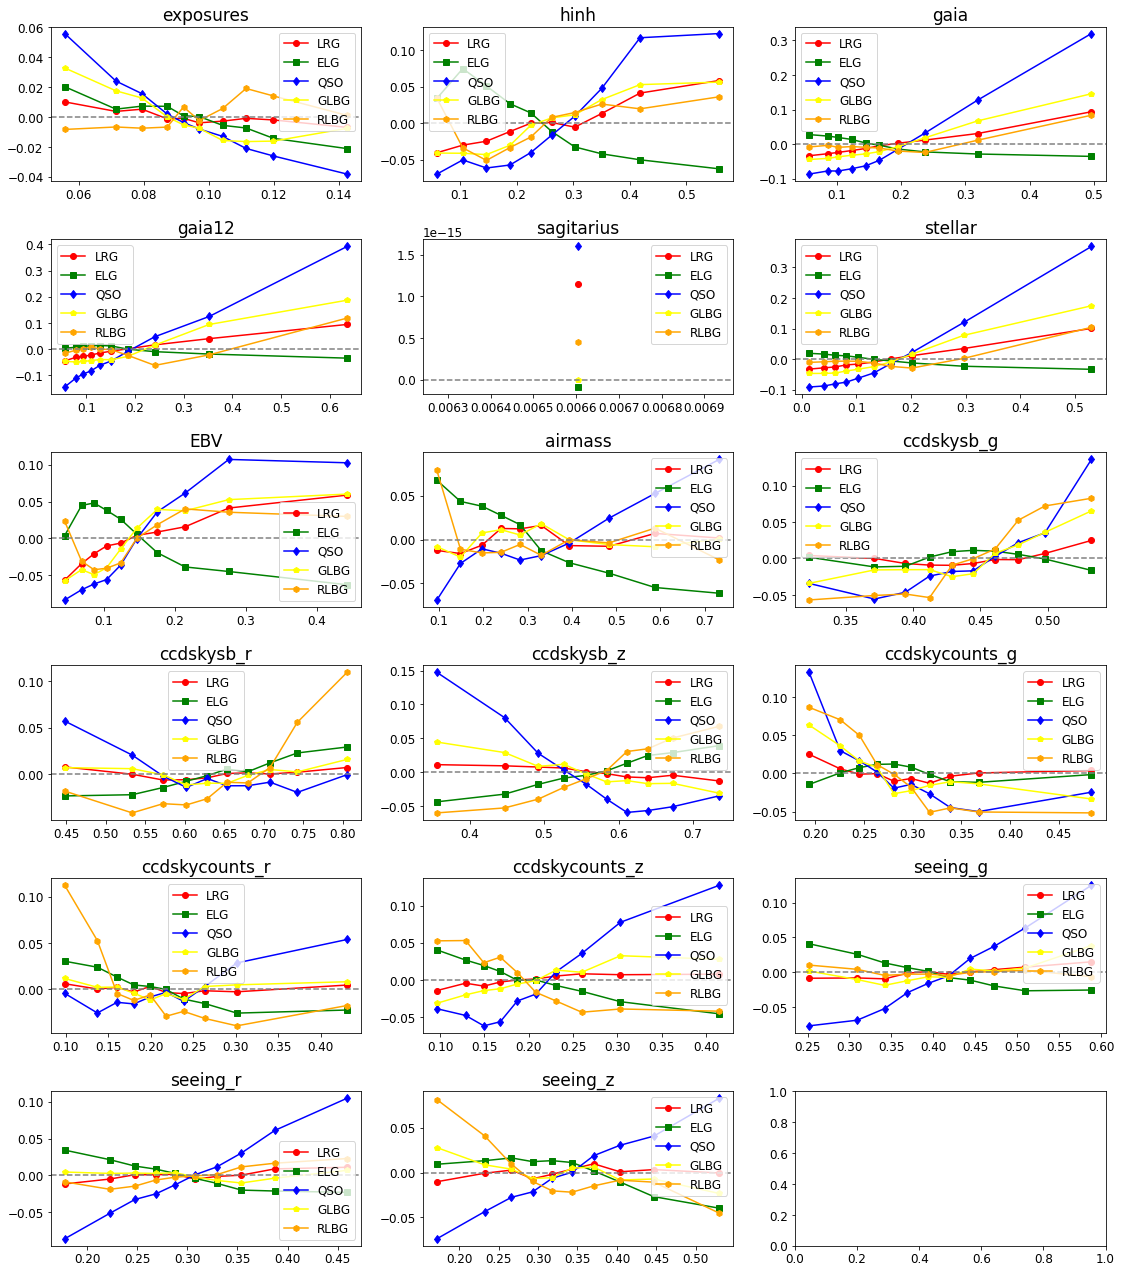

In [45]:
df = df_south

df['lrg_density'] = (df['lrg'] / df.lrg.mean()) - 1
df['elg_density'] = (df['elg'] / df.elg.mean()) - 1
df['qso_density'] = (df['qso'] / df.qso.mean()) - 1
df['glbg_density'] = (df['glbg'] / df.glbg.mean()) - 1
df['rlbg_density'] = (df['rlbg'] / df.rlbg.mean()) - 1

nrows = 6
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 18))

axs = axs.ravel()

for i, nm in enumerate(cols):

    df['bin'] = pd.qcut(df[nm], q=10, labels=False, duplicates='drop')
    grouped = df.groupby('bin')
    x = grouped[nm].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()
    glbg = grouped['glbg_density'].mean()
    rlbg = grouped['rlbg_density'].mean()

    axs[i].plot(x, lrg, c='red', marker='o', label="LRG")
    axs[i].plot(x, elg, c='green', marker='s', label="ELG")
    axs[i].plot(x, qso, c='blue', marker='d', label="QSO")
    axs[i].plot(x, glbg, c='yellow', marker='p', label="GLBG")
    axs[i].plot(x, rlbg, c='orange', marker='h', label="RLBG")

    axs[i].axhline(y=0, color='gray', linestyle='--')
    #axs[i].ylim([-0.25, 0.25])
    axs[i].set_title(nm)
    #axs[i].xlabel(nm)
    #axs[i].ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17


    """axs[i].rc('font', size=BIGGER_SIZE)  # controls default text sizes
    axs[i].rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
    axs[i].rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
    axs[i].rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
    axs[i].rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
    axs[i].rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
    axs[i].rc('figure', titlesize=MEDIUM_SIZE)"""

    axs[i].legend()

fig.tight_layout()

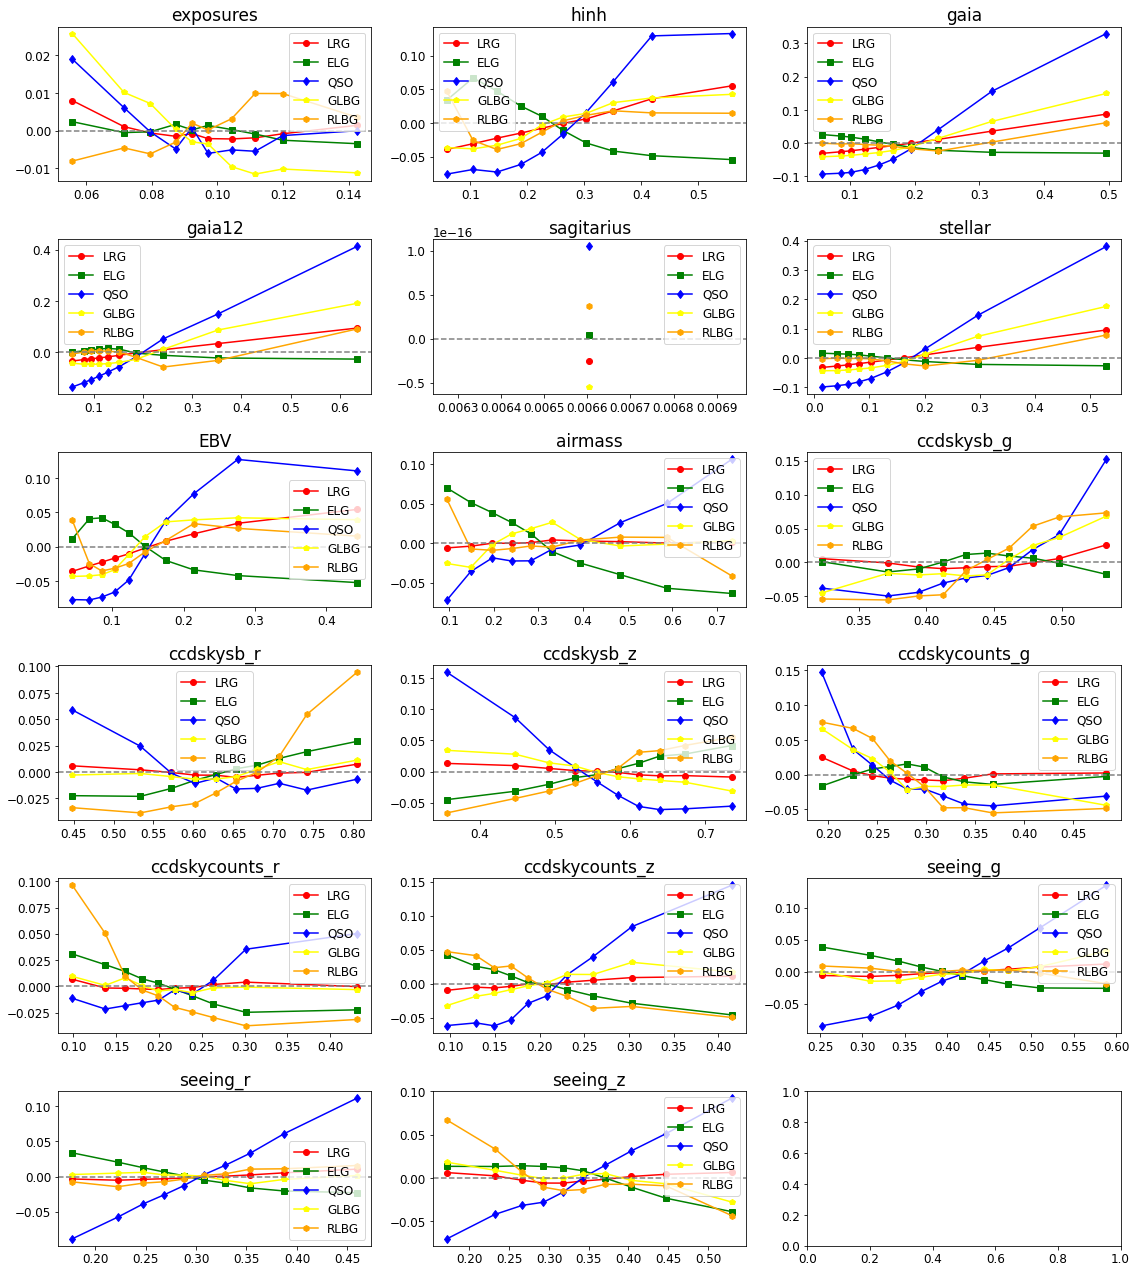

In [46]:
df = None
df = df_south

df['lrg_density'] = (df['lrg_nn'] / df.lrg_nn.mean()) - 1
df['elg_density'] = (df['elg_nn'] / df.elg_nn.mean()) - 1
df['qso_density'] = (df['qso_nn'] / df.qso_nn.mean()) - 1
df['glbg_density'] = (df['glbg_nn'] / df.glbg_nn.mean()) - 1
df['rlbg_density'] = (df['rlbg_nn'] / df.rlbg_nn.mean()) - 1

nrows = 6
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 18))

axs = axs.ravel()

for i, nm in enumerate(cols):

    df['bin'] = pd.qcut(df[nm], q=10, labels=False, duplicates='drop')
    grouped = df.groupby('bin')
    x = grouped[nm].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()
    glbg = grouped['glbg_density'].mean()
    rlbg = grouped['rlbg_density'].mean()

    axs[i].plot(x, lrg, c='red', marker='o', label="LRG")
    axs[i].plot(x, elg, c='green', marker='s', label="ELG")
    axs[i].plot(x, qso, c='blue', marker='d', label="QSO")
    axs[i].plot(x, glbg, c='yellow', marker='p', label="GLBG")
    axs[i].plot(x, rlbg, c='orange', marker='h', label="RLBG")

    axs[i].axhline(y=0, color='gray', linestyle='--')
    #axs[i].ylim([-0.25, 0.25])
    axs[i].set_title(nm)
    #axs[i].xlabel(nm)
    #axs[i].ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17


    """axs[i].rc('font', size=BIGGER_SIZE)  # controls default text sizes
    axs[i].rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
    axs[i].rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
    axs[i].rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
    axs[i].rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
    axs[i].rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
    axs[i].rc('figure', titlesize=MEDIUM_SIZE)"""

    axs[i].legend()

fig.tight_layout()

### Plots comparing the Models

In [89]:
area = 'south'
gal = 'qso'
df = df_south

df['lrg_density'] = (df['lrg'] / df.lrg.mean()) - 1
df['elg_density'] = (df['elg'] / df.elg.mean()) - 1
df['qso_density'] = (df['qso'] / df.qso.mean()) - 1
df['glbg_density'] = (df['glbg'] / df.glbg.mean()) - 1
df['rlbg_density'] = (df['rlbg'] / df.rlbg.mean()) - 1

df['lrg_lin_density'] = (df['lrg_lin'] / df.lrg_lin.mean()) - 1
df['elg_lin_density'] = (df['elg_lin'] / df.elg_lin.mean()) - 1
df['qso_lin_density'] = (df['qso_lin'] / df.qso_lin.mean()) - 1
df['glbg_lin_density'] = (df['glbg_lin'] / df.glbg_lin.mean()) - 1
df['rlbg_lin_density'] = (df['rlbg_lin'] / df.rlbg_lin.mean()) - 1

df['lrg_nn_density'] = (df['lrg_nn'] / df.lrg_nn.mean()) - 1
df['elg_nn_density'] = (df['elg_nn'] / df.elg_nn.mean()) - 1
df['qso_nn_density'] = (df['qso_nn'] / df.qso_nn.mean()) - 1
df['glbg_nn_density'] = (df['glbg_nn'] / df.glbg_nn.mean()) - 1
df['rlbg_nn_density'] = (df['rlbg_nn'] / df.rlbg_nn.mean()) - 1

df['lrg_deep_density'] = (df['lrg_deep'] / df.lrg_deep.mean()) - 1
df['elg_deep_density'] = (df['elg_deep'] / df.elg_deep.mean()) - 1
df['qso_deep_density'] = (df['qso_deep'] / df.qso_deep.mean()) - 1
df['glbg_deep_density'] = (df['glbg_deep'] / df.glbg_deep.mean()) - 1
df['rlbg_deep_density'] = (df['rlbg_deep'] / df.rlbg_deep.mean()) - 1



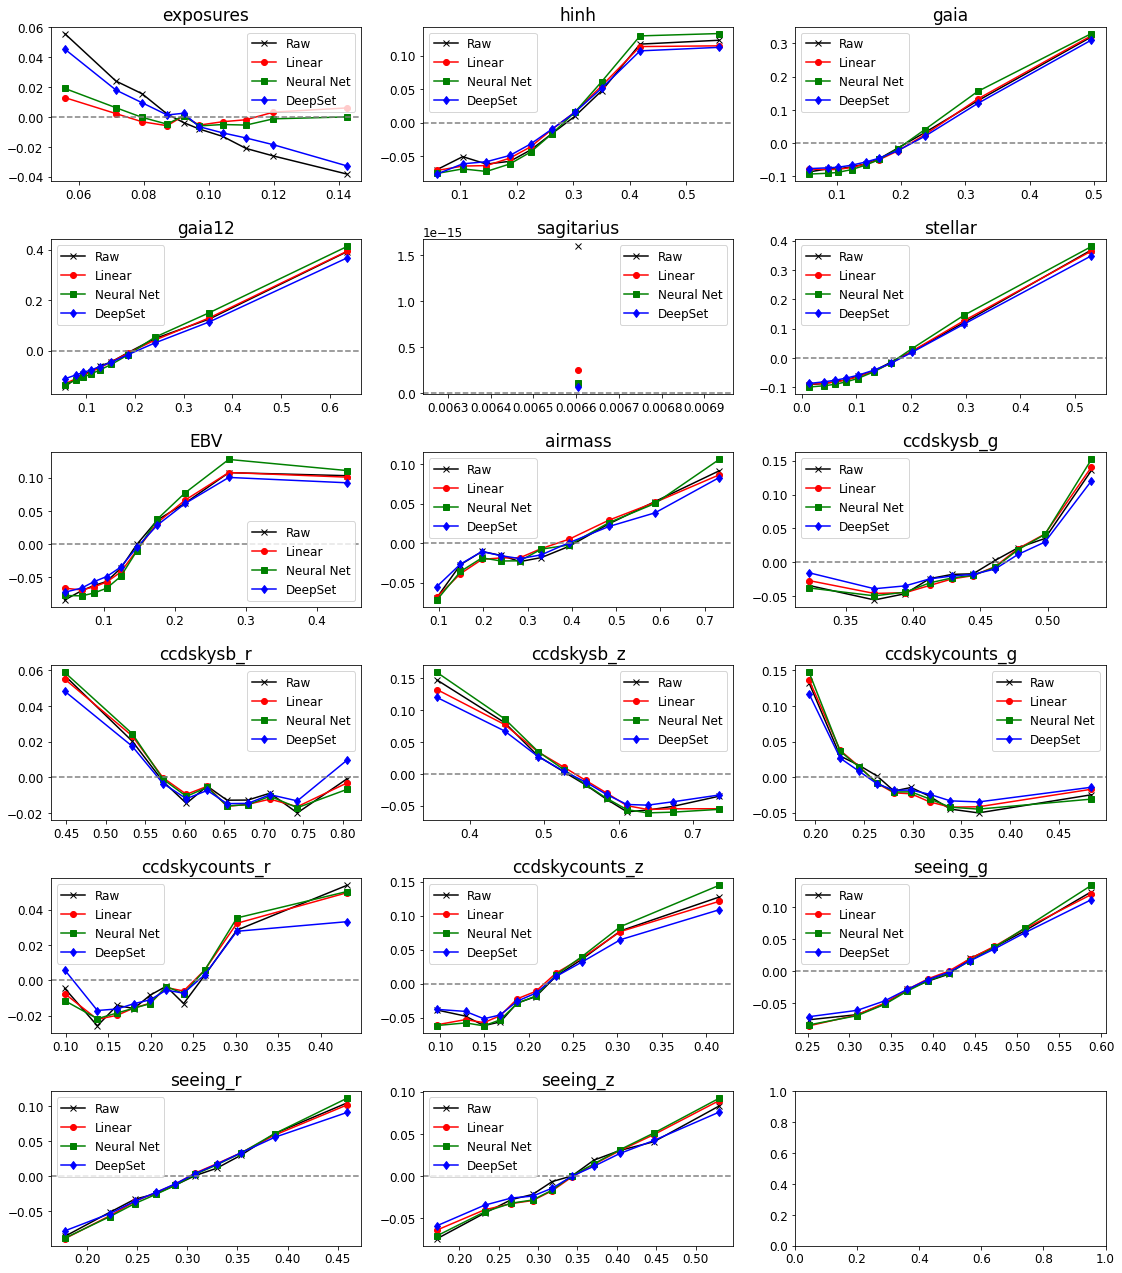

In [91]:

nrows = 6
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 18))

axs = axs.ravel()

for i, nm in enumerate(cols):

    df['bin'] = pd.qcut(df[nm], q=10, labels=False, duplicates='drop')
    grouped = df.groupby('bin')
    x = grouped[nm].mean()
    galtype = grouped[f'{gal}_density'].mean()
    galtype_lin = grouped[f'{gal}_lin_density'].mean()
    galtype_nn = grouped[f'{gal}_nn_density'].mean()
    galtype_deep = grouped[f'{gal}_deep_density'].mean()

    axs[i].plot(x, galtype, c='black', marker='x', label="Raw")
    axs[i].plot(x, galtype_lin, c='red', marker='o', label="Linear")
    axs[i].plot(x, galtype_nn, c='green', marker='s', label="Neural Net")
    axs[i].plot(x, galtype_deep, c='blue', marker='d', label="DeepSet")
    axs[i].axhline(y=0, color='gray', linestyle='--')


    axs[i].set_title(nm)



    axs[i].legend()


#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')




fig.tight_layout()

### Plots showing how much sky was cut

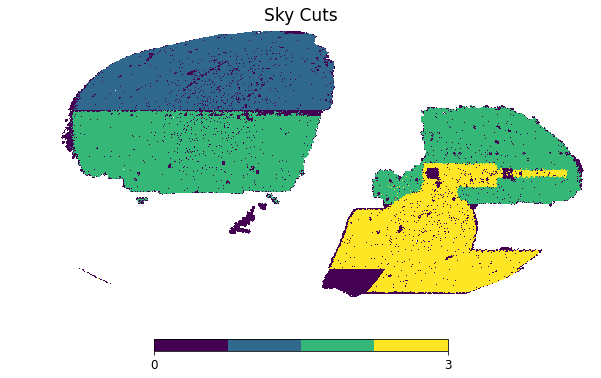

In [101]:
NSIDE = 512

area = 'north'
df_train = pd.read_csv(f'../../bricks_data/{area}_{NSIDE}.csv')
df_test = pd.read_csv(f'../../bricks_data/{area}_test_{NSIDE}.csv')
df_north = df_test.append(df_train)
area = 'south'
df_train = pd.read_csv(f'../../bricks_data/{area}_{NSIDE}.csv')
df_test = pd.read_csv(f'../../bricks_data/{area}_test_{NSIDE}.csv')
df_south = df_test.append(df_train)
area = 'des'
df_train = pd.read_csv(f'../../bricks_data/{area}_{NSIDE}.csv')
df_test = pd.read_csv(f'../../bricks_data/{area}_test_{NSIDE}.csv')
df_des = df_test.append(df_train)

fullmask = hp.read_map("../../bricks_data/masks/mask_512.fits")

fullmask = fullmask[hp.ring2nest(512, np.arange(hp.nside2npix(512)))]

fullmask = 1*fullmask
hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN

# Get Full Area
hpmap[fullmask == 0] = 0
hpmap[fullmask == 1] = 0


# Show ares that were retained after cleansing
hpmap[df_north['pixel_id']] = 1
hpmap[df_south['pixel_id']] = 2
hpmap[df_des['pixel_id']] = 3

hp.mollview(hpmap, rot=120, badcolor='white', cmap=cm.get_cmap('viridis', 4),title="Sky Cuts")
#plt.savefig(f"report_fig/skycuts.png", format='png', dpi=800)
